In [140]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_regions = 85

   # Генерируем данные с тремя центрами кластеров
centers = [[15, 60], [20, 60], [12, 60]]  # центры кластеров (безработица, образование)
cluster_labels = np.random.choice([0, 1, 2], size=num_regions)
data = np.array([np.random.multivariate_normal(centers[label], [[1, 0], [0, 4]]) for label in cluster_labels])

regions = [f'Region {i+1}' for i in range(num_regions)]
data = pd.DataFrame(data, columns=['Unemployment', 'Education'], index=regions)
data.to_csv('structured_data.csv')

   
data



,Unemployment,Education
Region 1,11.461858,61.547401
Region 2,14.119409,57.306644
Region 3,12.134429,57.738895
Region 4,12.887748,61.164246
Region 5,15.754998,61.788665
...,...,...
Region 81,13.066199,61.744894
Region 82,16.382005,58.081984
Region 83,19.396096,61.810244
Region 84,15.257207,60.608898


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

data

,Unemployment,Education
Region 1,11.461858,61.547401
Region 2,14.119409,57.306644
Region 3,12.134429,57.738895
Region 4,12.887748,61.164246
Region 5,15.754998,61.788665
...,...,...
Region 81,13.066199,61.744894
Region 82,16.382005,58.081984
Region 83,19.396096,61.810244
Region 84,15.257207,60.608898


In [142]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

scaled_data

,Unemployment,Education
Region 1,-1.311036,0.648884
Region 2,-0.562687,-1.491202
Region 3,-1.121645,-1.273067
Region 4,-0.909515,0.455526
Region 5,-0.102115,0.770637
...,...,...
Region 81,-0.859264,0.748548
Region 82,0.074446,-1.099929
Region 83,0.923195,0.781527
Region 84,-0.242290,0.175271


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_64061/624332036.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))


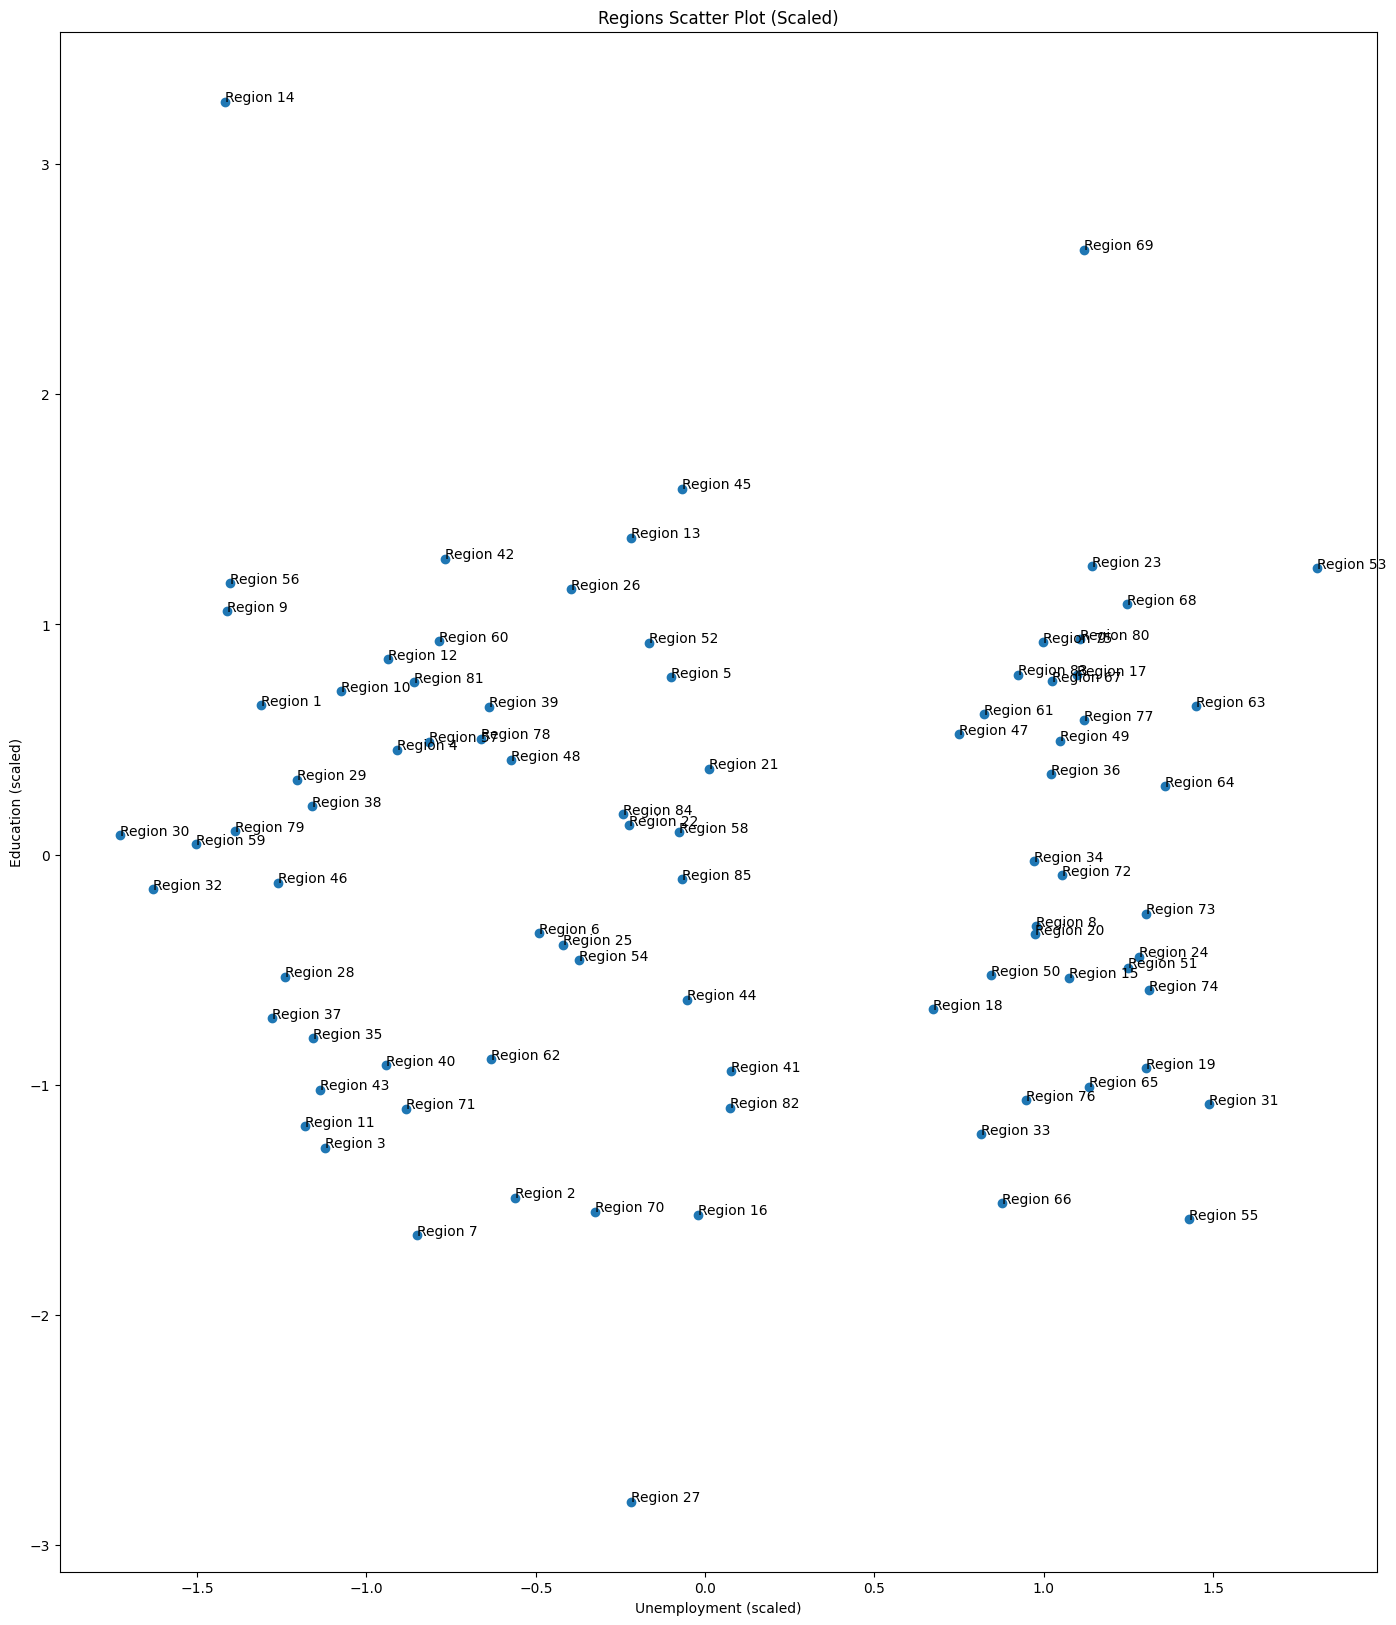

In [143]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['Unemployment'], scaled_data['Education'])
for i, txt in enumerate(scaled_data.index):
    plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))
plt.xlabel('Unemployment (scaled)')
plt.ylabel('Education (scaled)')
plt.title('Regions Scatter Plot (Scaled)')
plt.show()

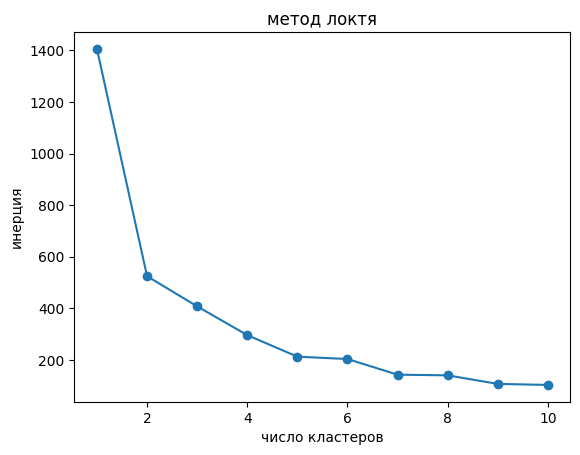

In [144]:
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

In [155]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

In [156]:
sil = silhouette_score(scaled_data, labels)
db = davies_bouldin_score(scaled_data, labels)

In [157]:
data['cluster'] = labels
data.head()

,Unemployment,Education,cluster
Region 1,11.461858,61.547401,0
Region 2,14.119409,57.306644,0
Region 3,12.134429,57.738895,0
Region 4,12.887748,61.164246,0
Region 5,15.754998,61.788665,0


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_64061/343293419.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))


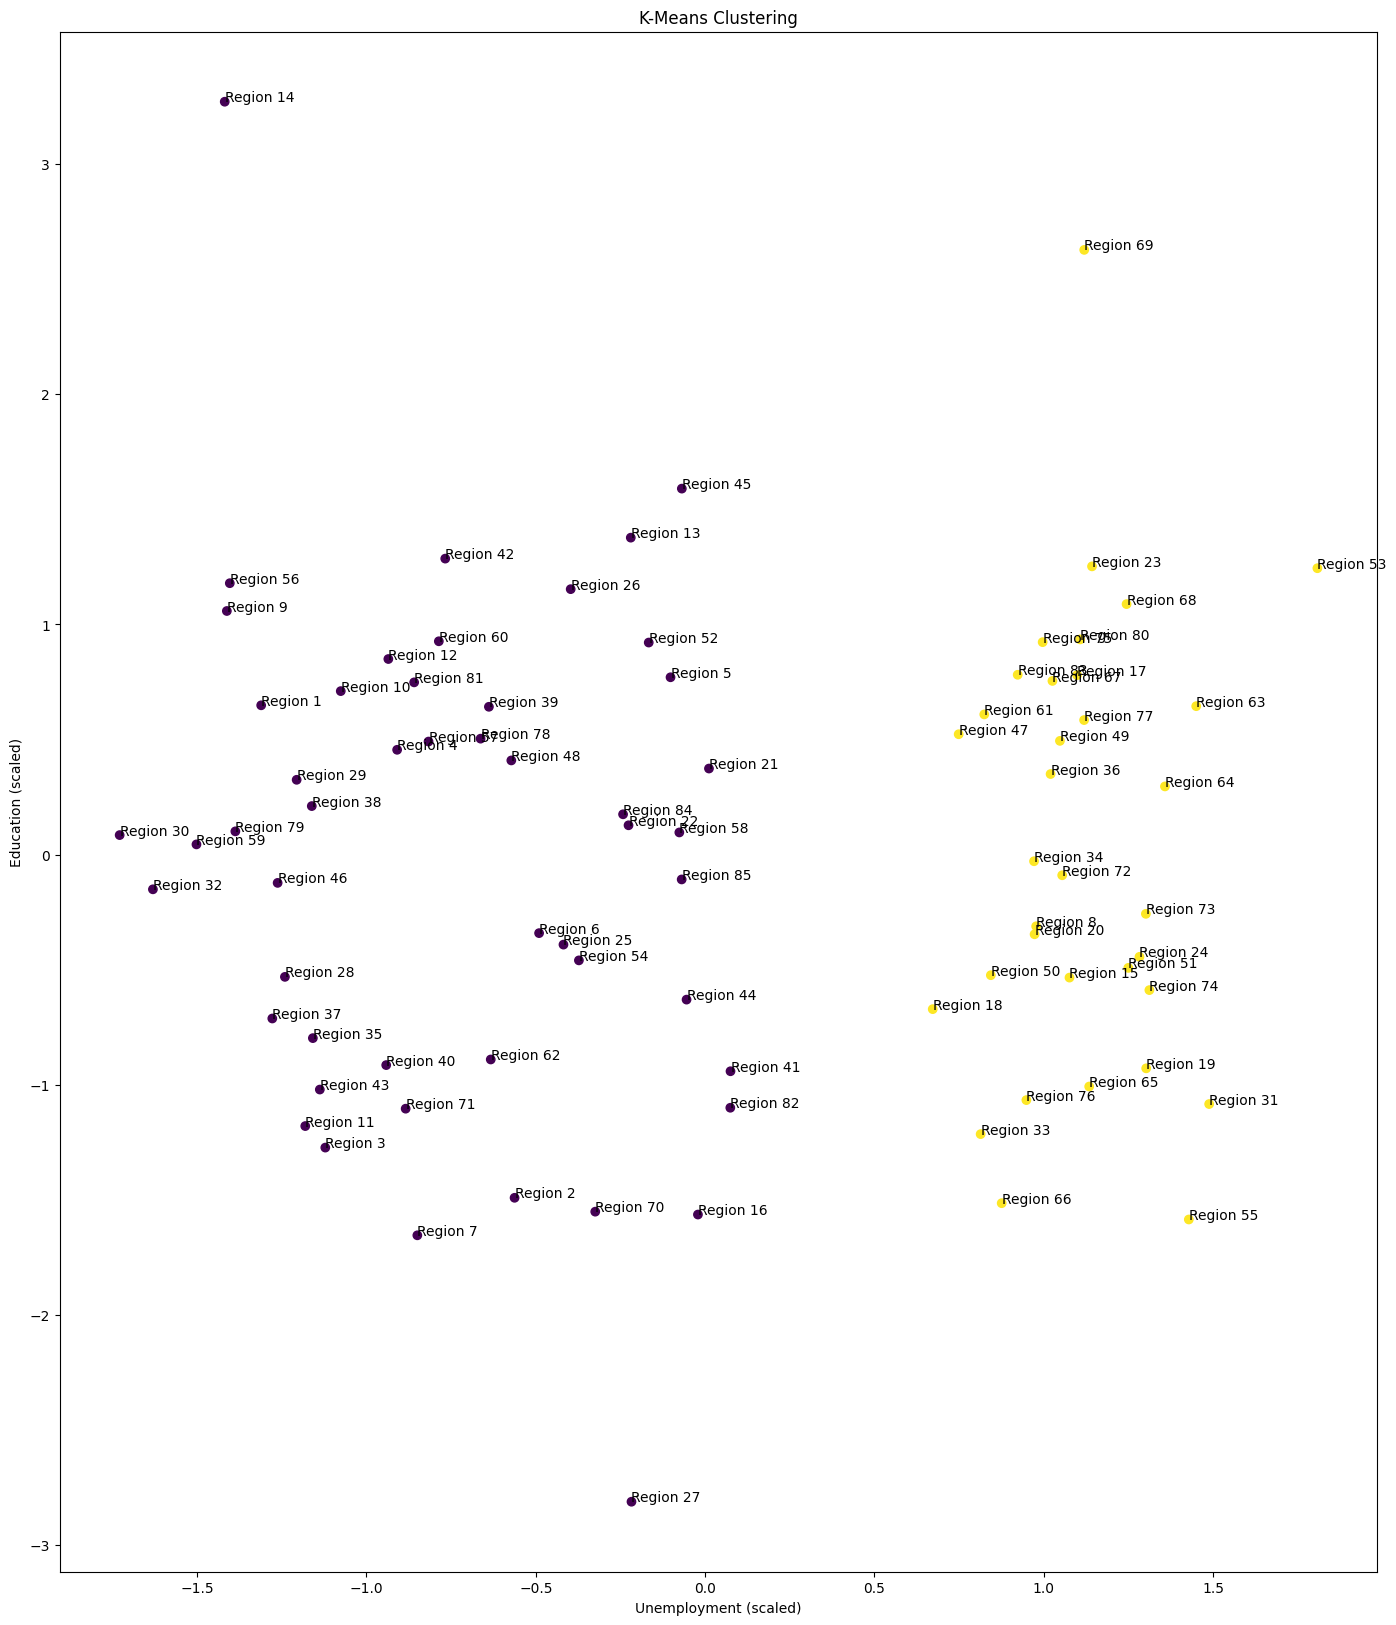

In [158]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['Unemployment'], scaled_data['Education'], c=labels, cmap='viridis')
for i, txt in enumerate(scaled_data.index):
    plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))
plt.xlabel('Unemployment (scaled)')
plt.ylabel('Education (scaled)')
plt.title('K-Means Clustering')
plt.show()

In [159]:
print(f"Silhouette Coefficient: {sil}")
print(f"Davies-Bouldin Index: {db}")

Silhouette Coefficient: 0.41464332255942776
Davies-Bouldin Index: 0.9972608275528047


# DBSCAN


In [150]:
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(scaled_data)
labels = dbscan.labels_

In [151]:

data['cluster'] = labels

/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_64061/1353855699.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))


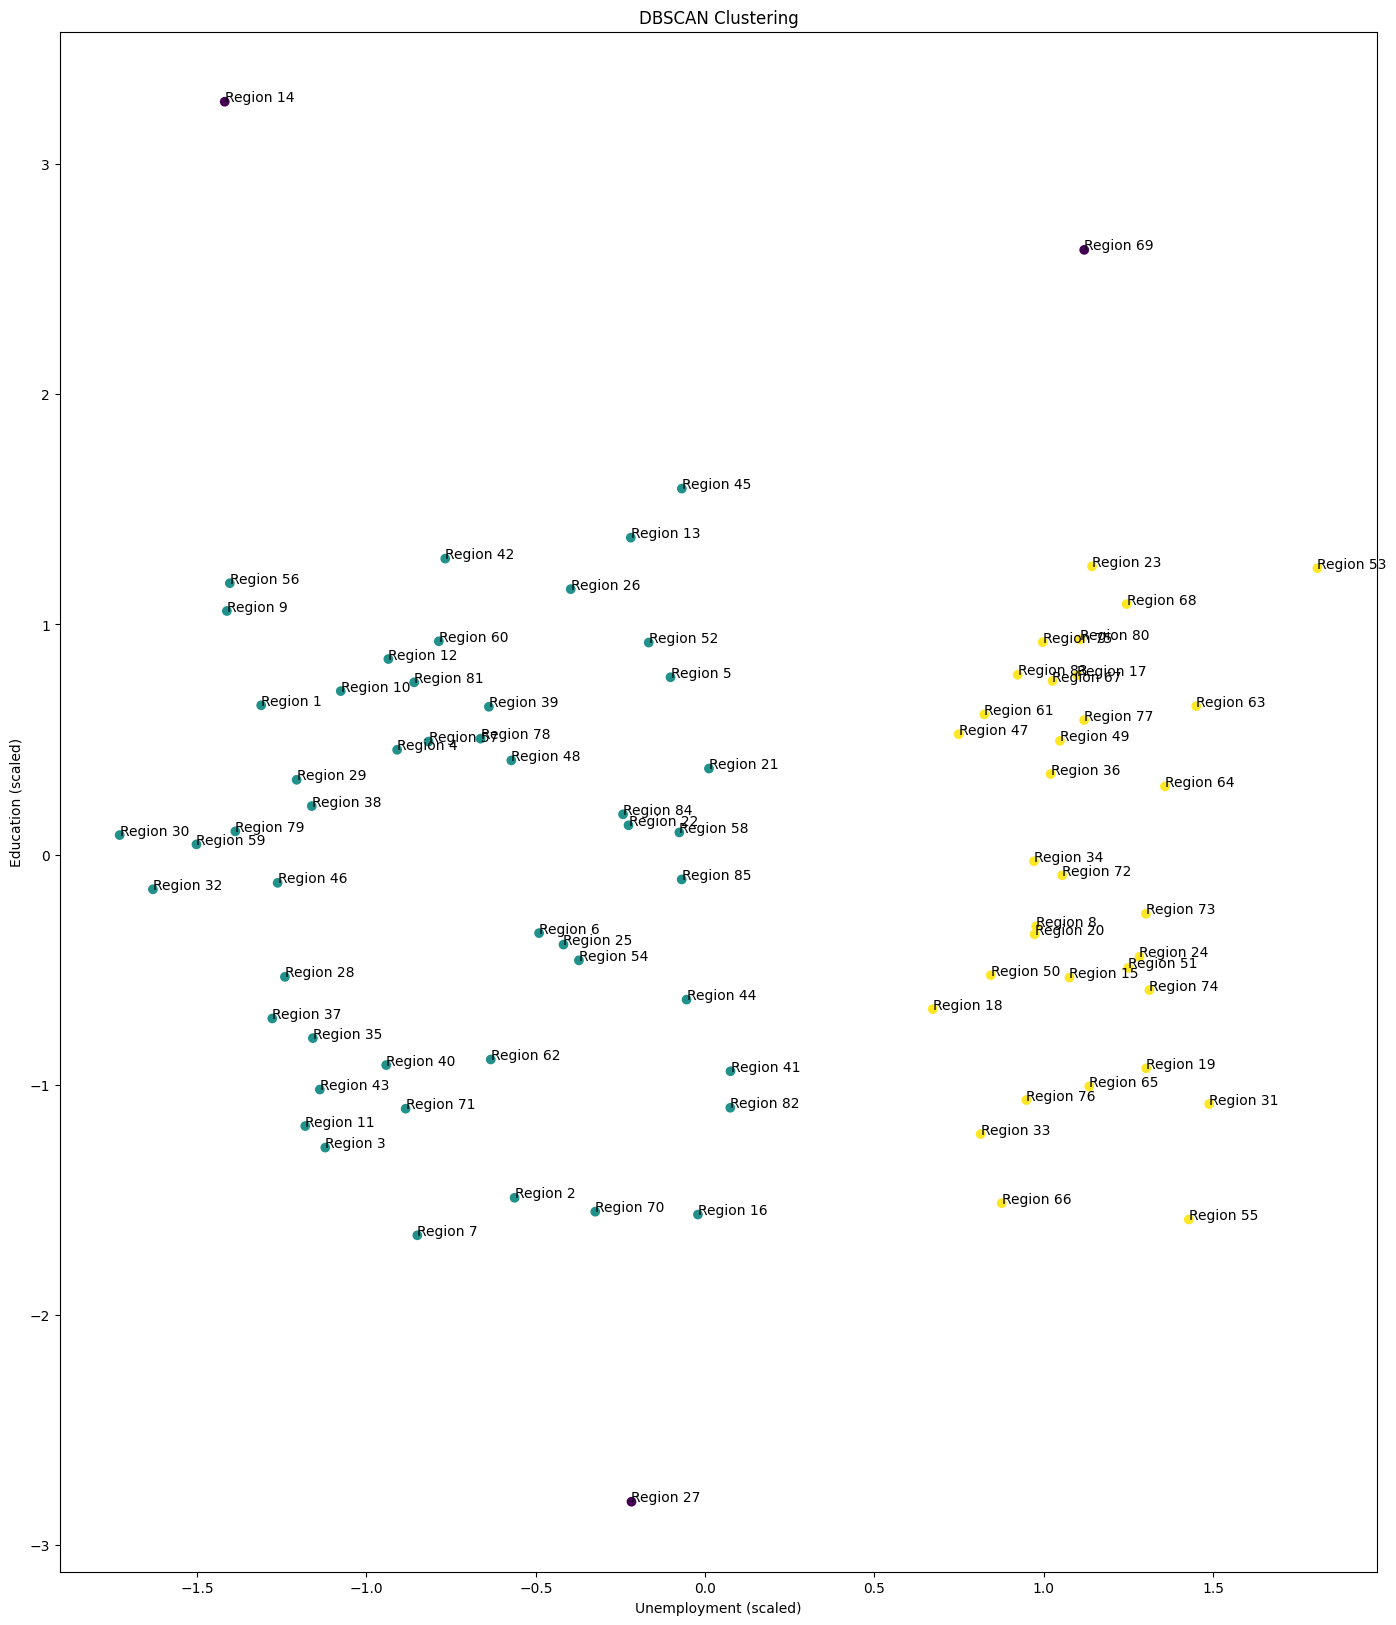


Шумовые точки:
           Unemployment  Education  cluster
Region 14     11.079609  66.744593       -1
Region 27     15.345518  54.689648       -1
Region 69     20.093765  65.468844       -1


In [154]:
# Scatter plot с кластерами
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['Unemployment'], scaled_data['Education'], c=labels, cmap='viridis')
for i, txt in enumerate(scaled_data.index):
    plt.annotate(txt, (scaled_data['Unemployment'][i], scaled_data['Education'][i]))
plt.xlabel('Unemployment (scaled)')
plt.ylabel('Education (scaled)')
plt.title('DBSCAN Clustering')
plt.show()

#Поиск шумовых точек
noise = data[data['cluster'] == -1]
print("\nШумовые точки:")
print(noise)

In [153]:
# Метрики (Silhouette может быть неопределён для некоторых данных с DBSCAN)
try:
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")
except ValueError:
    print("Silhouette Coefficient is undefined for DBSCAN with this configuration.")

db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Coefficient: 0.41490630069218704
Davies-Bouldin Index: 2.7978117539110627
